In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/heart_disease.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [3]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df['oldpeak']


,oldpeak
0,2.3
1,0.0
2,0.4
3,0.0
4,1.5
...,...
903,1.5
904,3.0
905,2.5
906,NaN


In [6]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [7]:
df['oldpeak'].mean()

0.8912529550827422

In [8]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].mean())

In [9]:
df['oldpeak'].isna().sum()

0

In [10]:
df['oldpeak']=df['oldpeak'].astype(int)


In [11]:
df.dtypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,int64


In [12]:
df['sex']= df['sex'].replace({'Female':0,'Male':1})

<ipython-input-12-d49e6df7b1e6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex']= df['sex'].replace({'Female':0,'Male':1})


In [13]:
df['sex']=df['sex'].astype(int)

In [14]:
df['cp'].value_counts()

,count
cp,
asymptomatic,495
non-anginal,203
atypical angina,165
typical angina,45


In [16]:
df['restecg'].value_counts()

,count
restecg,
normal,542
lv hypertrophy,187
st-t abnormality,179


In [17]:
df['exang'].value_counts()

,count
exang,
FALSE,535
TRUE,337
TURE,36


In [18]:
df['slope'].value_counts()

,count
slope,
flat,453
upsloping,298
downsloping,157


In [19]:
df['thal'].value_counts()

,count
thal,
normal,348
reversable defect,346
fixed defect,214


In [15]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()
df['cp']=label_encoder.fit_transform(df['cp'])

In [22]:
df['restecg']=label_encoder.fit_transform(df['restecg'])

In [23]:
df['exang']=label_encoder.fit_transform(df['exang'])

In [24]:
df['slope']=label_encoder.fit_transform(df['slope'])

In [25]:
df['thal']=label_encoder.fit_transform(df['thal'])

In [27]:
df['fbs']=label_encoder.fit_transform(df['fbs'])

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2,0,0,0
1,41,1,1,135,203,0,1,132,0,0,1,0,0
2,57,1,0,140,192,0,1,148,0,0,1,0,0
3,52,1,3,118,186,0,0,190,0,0,1,0,0
4,57,1,0,110,201,0,1,126,1,1,1,0,0


In [29]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalch,int64
exang,int64
oldpeak,int64


In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,0.790749,0.777533,133.430617,201.484581,0.203744,0.991189,135.957048,0.450441,0.686123,1.155286,1.145374,1.008811
std,9.158031,0.406998,0.958374,20.401608,112.097949,0.403003,0.635177,26.804929,0.572013,1.001402,0.691023,0.772181,1.144436
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
25%,47.750000,1.000000,0.000000,120.000000,176.750000,0.000000,1.000000,118.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,224.000000,0.000000,1.000000,138.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,144.000000,270.000000,0.000000,1.000000,156.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,2.000000,6.000000,2.000000,2.000000,4.000000


In [32]:
df.duplicated().sum()

0

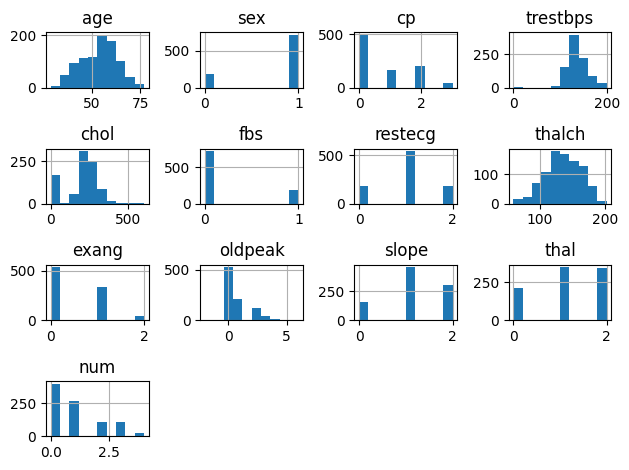

In [34]:
df.hist()
plt.tight_layout()

<Axes: >

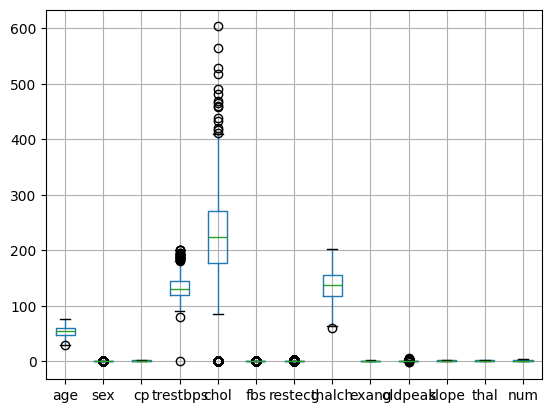

In [33]:
df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x789331e36a70>,
 'caps': [<matplotlib.lines.Line2D at 0x789331e36fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789331e367d0>],
 'medians': [<matplotlib.lines.Line2D at 0x789331e374f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789331e37790>],
 'means': []}

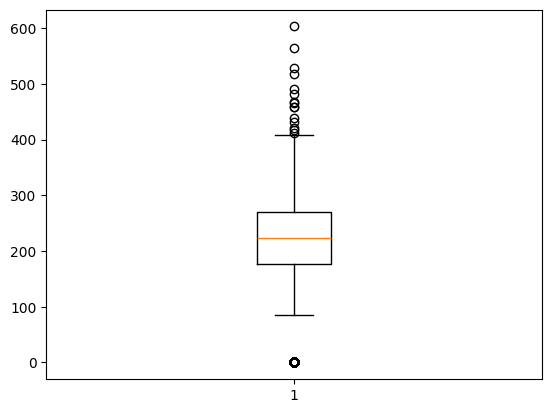

In [35]:
plt.boxplot(df['chol'])

In [36]:
def outlier_detection(data,column):
  q1 =data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr = q3- q1
  upper_ext = q3+ iqr*1.5
  lower_ext = q1 - iqr*1.5
  return lower_ext,upper_ext,iqr


In [37]:
outlier_detection(df,'chol')

(36.875, 409.875, 93.25)

In [40]:
df.loc[df['chol']>409.875,'chol']=409.875

{'whiskers': [<matplotlib.lines.Line2D at 0x789331d69570>,
 'caps': [<matplotlib.lines.Line2D at 0x789331e86f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x789331d692d0>],
 'medians': [<matplotlib.lines.Line2D at 0x789331d69ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789331d6a170>],
 'means': []}

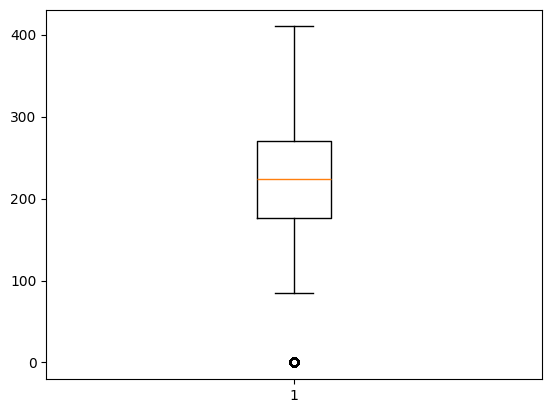

In [41]:
plt.boxplot(df['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x789331db3a60>,
 'caps': [<matplotlib.lines.Line2D at 0x789331db3fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789331db37c0>],
 'medians': [<matplotlib.lines.Line2D at 0x789331dec520>],
 'fliers': [<matplotlib.lines.Line2D at 0x789331dec7c0>],
 'means': []}

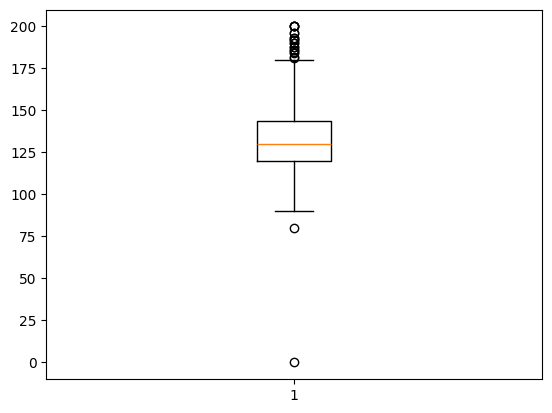

In [42]:
plt.boxplot(df['trestbps'])

In [50]:
outlier_detection(df,'trestbps')

(90.0, 170.0, 20.0)

In [52]:
df.loc[df['trestbps']>170,'trestbps']=170

{'whiskers': [<matplotlib.lines.Line2D at 0x789331a7dd80>,
 'caps': [<matplotlib.lines.Line2D at 0x789331a7e2c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x789331a7dae0>],
 'medians': [<matplotlib.lines.Line2D at 0x789331a7e800>],
 'fliers': [<matplotlib.lines.Line2D at 0x789331a7eaa0>],
 'means': []}

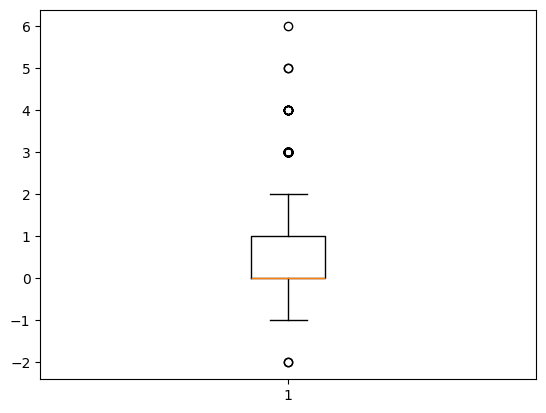

In [53]:
plt.boxplot(df['oldpeak'])

In [55]:
outlier_detection(df,'oldpeak')

(-1.5, 2.5, 1.0)

In [58]:
df.loc[df['oldpeak']>2.5,'oldpeak']=2.5

<ipython-input-58-d3dd3e4f4a5a>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['oldpeak']>2.5,'oldpeak']=2.5


<Axes: >

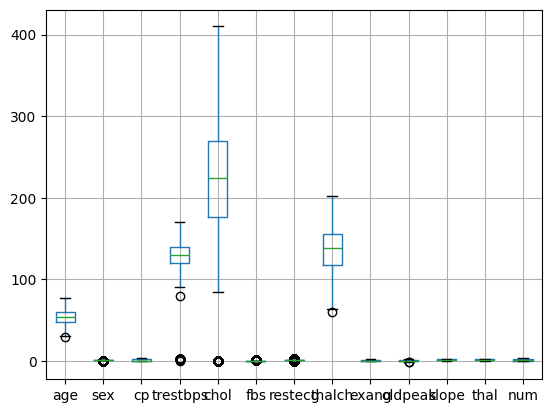

In [59]:
df.boxplot()

<Axes: >

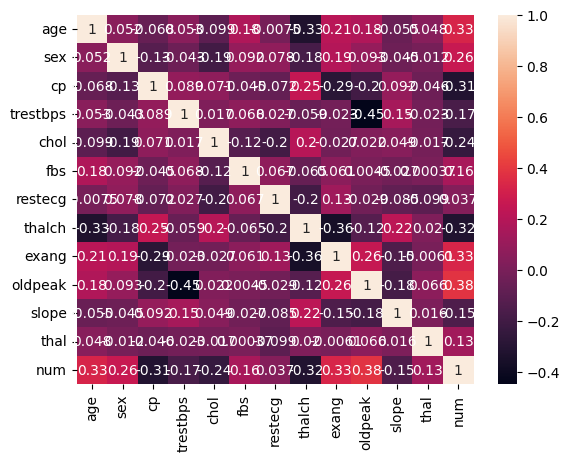

In [61]:
sns.heatmap(df.corr(),annot=True)

In [62]:
df['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [63]:
x = df.drop('num',axis=1)
y=df['num']

In [64]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145.0,233.0,1,0,150,0,2.0,0,0
1,41,1,1,135.0,203.0,0,1,132,0,0.0,1,0
2,57,1,0,140.0,192.0,0,1,148,0,0.0,1,0
3,52,1,3,118.0,186.0,0,0,190,0,0.0,1,0
4,57,1,0,110.0,201.0,0,1,126,1,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125.0,0.0,0,1,120,0,1.0,2,0
904,62,1,0,2.5,170.0,0,2,120,1,2.5,1,1
905,56,1,2,170.0,0.0,0,0,123,1,2.0,0,1
906,56,1,2,144.0,208.0,1,2,105,2,0.0,0,2


In [65]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
372,37,0,0,130.0,173.0,0,2,184,0,0.0,2,2
304,41,1,1,125.0,269.0,0,1,144,0,0.0,2,0
524,41,1,0,130.0,172.0,0,2,130,0,2.0,1,2
85,71,0,1,160.0,302.0,0,1,162,0,0.0,2,1
530,56,0,1,120.0,279.0,0,1,150,0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
835,61,1,3,142.0,200.0,1,2,100,0,1.0,0,0
192,72,1,2,160.0,0.0,0,0,114,0,1.0,1,0
629,55,1,3,140.0,295.0,0,2,136,0,0.0,1,0
559,59,1,0,140.0,0.0,0,2,117,1,1.0,1,0


In [68]:
y_train

,num
372,0
304,0
524,1
85,0
530,1
...,...
835,3
192,0
629,1
559,1


In [69]:
x_test


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
251,56,1,2,130.0,409.875,0,1,114,0,0.0,2,0
732,59,1,2,167.0,0.000,0,1,128,1,2.0,0,0
497,46,1,0,118.0,186.000,0,1,124,0,0.0,2,2
887,57,1,0,165.0,289.000,1,0,124,0,1.0,1,2
144,46,1,0,110.0,240.000,0,2,140,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,1,0,2.5,248.000,0,1,140,1,2.5,0,0
687,46,1,0,134.0,310.000,0,1,126,0,0.0,2,1
635,43,1,3,120.0,291.000,0,2,155,0,0.0,0,2
2,57,1,0,140.0,192.000,0,1,148,0,0.0,1,0


In [70]:
y_test

,num
251,0
732,2
497,1
887,4
144,0
...,...
899,4
687,2
635,1
2,0


In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [111]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'x[2] <= 0.5\nentropy = 1.917\nsamples = 726\nvalue = [323.0, 210.0, 87.0, 84.0, 22.0]'),
 Text(0.25, 0.625, 'x[9] <= 1.5\nentropy = 2.08\nsamples = 388\nvalue = [80.0, 155.0, 73.0, 62.0, 18.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= 42.5\nentropy = 1.986\nsamples = 280\nvalue = [74.0, 116.0, 48.0, 34.0, 8.0]'),
 Text(0.0625, 0.125, 'entropy = 2.007\nsamples = 79\nvalue = [6, 32, 20, 17, 4]'),
 Text(0.1875, 0.125, 'entropy = 1.865\nsamples = 201\nvalue = [68, 84, 28, 17, 4]'),
 Text(0.375, 0.375, 'x[0] <= 58.5\nentropy = 2.074\nsamples = 108\nvalue = [6, 39, 25, 28, 10]'),
 Text(0.3125, 0.125, 'entropy = 1.789\nsamples = 65\nvalue = [3, 35, 11, 13, 3]'),
 Text(0.4375, 0.125, 'entropy = 2.07\nsamples = 43\nvalue = [3.0, 4.0, 14.0, 15.0, 7.0]'),
 Text(0.75, 0.625, 'x[0] <= 55.5\nentropy = 1.291\nsamples = 338\nvalue = [243.0, 55.0, 14.0, 22.0, 4.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 156.5\nentropy = 0.85\nsamples = 212\n

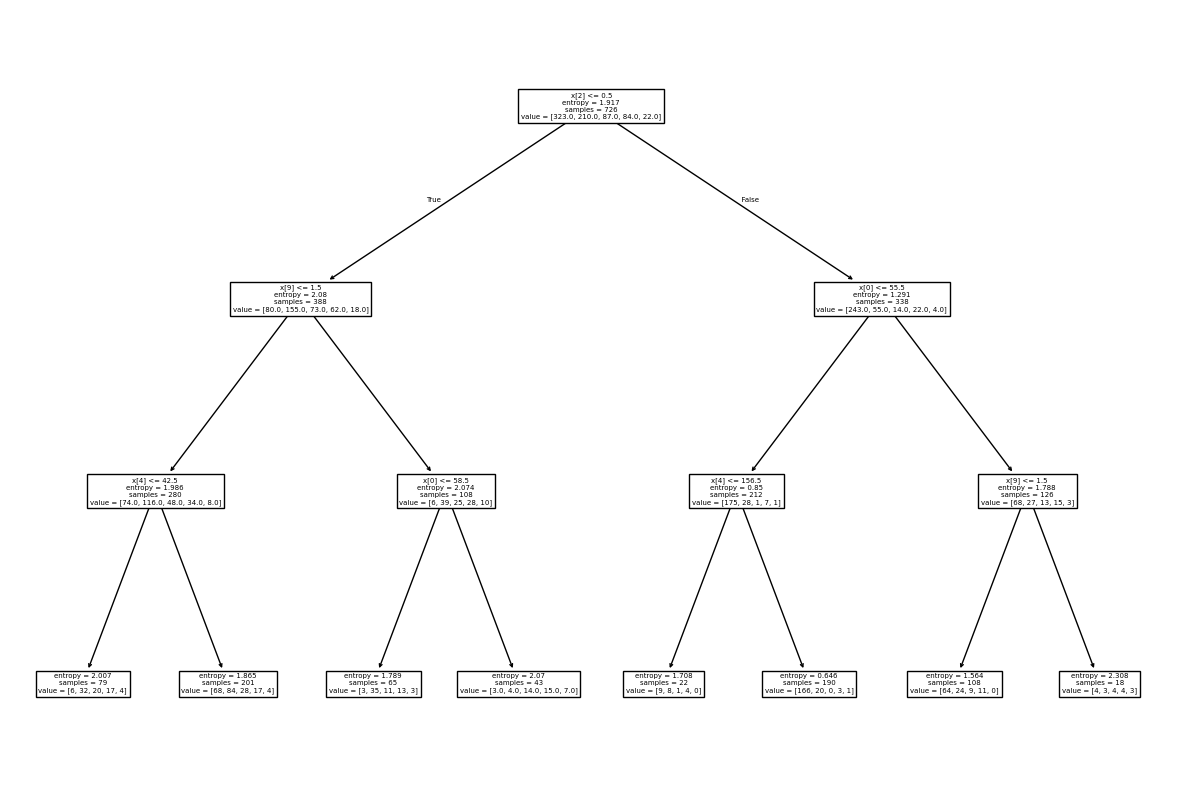

In [112]:
plt.figure(figsize=(15,10))
tree.plot_tree(model)


In [113]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the cou

,count
1,93
0,75
3,14


In [114]:
model.feature_importances_

array([0.17580279, 0.        , 0.52546957, 0.        , 0.15016589,
       0.        , 0.        , 0.        , 0.        , 0.14856175,
       0.        , 0.        ])

In [115]:
preds

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 3, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 1, 0,
       1, 0, 1, 3, 1, 3, 0, 1, 0, 0, 0, 3, 1, 1, 0, 1, 3, 1, 1, 0, 1, 0,
       1, 1, 3, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 3, 1, 0, 1, 1])

In [116]:
pd.crosstab(y_test,preds)

col_0,0,1,3
num,,,
0,53,21,2
1,13,40,2
2,6,13,3
3,2,18,3
4,1,1,4


In [117]:
np.mean(preds==y_test)

0.5274725274725275

In [118]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# 'gini' is a common criterion, and max_depth helps prevent overfitting

In [119]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [121]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)



print(f"Accuracy: {accuracy}")


Accuracy: 0.521978021978022
